# Random Forest

In [1]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts

import warnings
warnings.simplefilter('ignore')

In [2]:
boston=load_boston()

In [3]:
X=boston.data

y=boston.target

In [4]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### Random Forest

![RF](../images/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

**Entropía de información**

$$H(x) = -\sum_i p_ilog(p_i)$$

$$H(x) = -\sum_i p_ilog(p_i) + (1-p_i)log(1-p_i)$$

**Bagging**

Bootstrap aggregating.

Muestreo aleatorio con reemplazamiento y de manera uniforme. Después se hace la media. Además RF coge para cada árbol un subconjunto de características de manera aleatoria (feature bagging), esto se hace para evitar la correlación entre árboles dentro del bosque.

**Extratrees**

Extremely randomized trees.

Tiene básicamente 2 diferencias:
+ Cada árbol usa todo el train (no bootstrap)
+ El spliteo hacia abajo es random (no minimizando entropia)

In [6]:
# Rf

from sklearn.ensemble import RandomForestRegressor as RFR

In [7]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

0.9783551670762717 0.8806779044066222


In [8]:
rfr

RandomForestRegressor()

In [9]:
rfr=RFR(n_estimators=243)
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

0.9800046378583751 0.88926426825966


In [10]:
# Extra trees

from sklearn.tree import ExtraTreeRegressor as ETR

In [11]:
etr=ETR()
etr.fit(X_train, y_train)

train_score=etr.score(X_train, y_train)    # R2
test_score=etr.score(X_test, y_test)

print (train_score, test_score)

1.0 0.7009028744447955


In [12]:
etr

ExtraTreeRegressor()

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC

In [14]:
dtc=DTC(criterion='gini')

dtc.fit(load_iris().data, load_iris().target)

DecisionTreeClassifier()

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


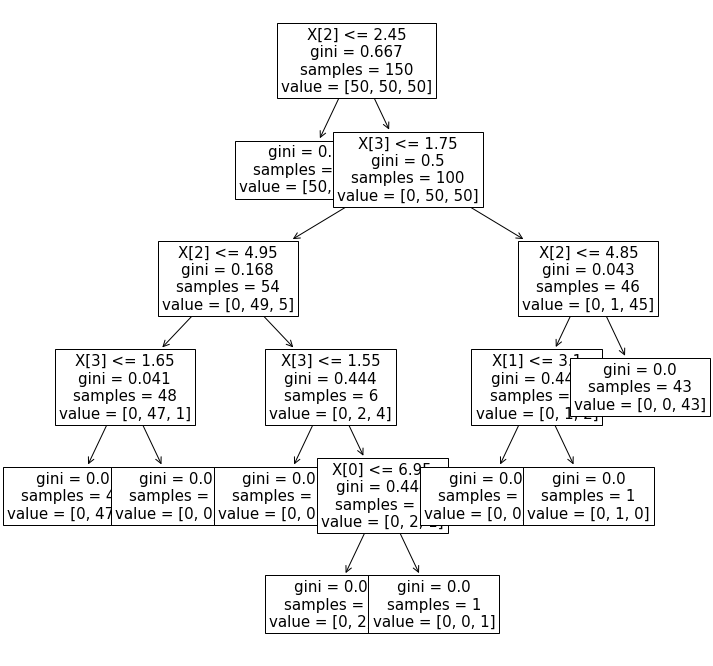

In [15]:
import pylab as plt 
from sklearn.tree import plot_tree

print(load_iris().target_names, load_iris().feature_names)
plt.figure(figsize=(12, 12))
plot_tree(dtc, fontsize=15);